In [32]:
%matplotlib inline

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import Set1
from matplotlib import cm
from sklearn.manifold import TSNE
from time import time

### Plotting functions

In [34]:
def scatter_matrix(X, y, save=None):
    """
    Build a scatter matrix.
    :param save: if not None, then save plot to 'scatter_matrix_[save].png' file
    """
    scatter_matrix = pd.plotting.scatter_matrix(X, c = y, marker = 'o',
                                   s=40, hist_kwds={'bins':15},
                                   figsize=(15,15))
    if save:
        plt.savefig('scatter_matrix_{}.png'.format(save))

In [94]:
def box_plots(X, y, save=None):
    """
    Build a box plot for each feature.
    :param save: if not None, then save plot to 'box_plot_[save].png' file
    """
    targets = y.unique()
    
    f, ax = plt.subplots(len(X.columns), len(targets), figsize=(5, 20), sharey=True)
    plt.subplots_adjust(hspace=0.5)
    for index, feature in enumerate(X.columns):
        human_plot = ax[index][0]
        human_plot.set_title('Human')
        bot_plot = ax[index][1]
        bot_plot.set_title('Bot')
        
        X[y==1][feature].plot.box(ax=bot_plot, sharey=True)
        X[y==0][feature].plot.box(ax=human_plot, sharey=True)
    if save:
        plt.savefig('box_plot_{}.png'.format(save))
    plt.show()

In [48]:
def simple_plot(X, y, save=None):
    """
    Build a simple comparative plot for each feature.
    :param save: if not None, then save plot to 'simple_plot_[save].png' file
    """
    
    bot_data = X[y==1]
    human_data = X[y==0]
    human_data.index = range(len(human_data))
    bot_data.index = range(len(bot_data))
    features = X.columns
    
    plt.figure(figsize=(15, 15))
    for index, feature in enumerate(features):
        plt.subplot(len(features), 1, index + 1)
        plt.plot(bot_data[feature], label='bot')
        plt.plot(human_data[feature], label='human')

        plt.ylabel(feature)
        plt.legend(loc='best')
    
    if save:
        plt.savefig('simple_plot_{}.png'.format(save))
    
    plt.show()

In [37]:
def tsne_plot(X, y, perp=40, save=None):
    """
    Build a t-SNE plot for all features.
    :param save: if not None, then save plot to 'tsne_plot_[save].png' file
    """
    begin_time = time()
    tsne_res = TSNE(perplexity=perp).fit_transform(X)
    xs = tsne_res[:,0]
    ys = tsne_res[:,1]
    plt.scatter(xs[y==0], ys[y==0], c='r', label='human')
    plt.scatter(xs[y==1], ys[y==1], c='b', label='bot')
    plt.legend(loc='best')
    print('Time elapsed:', time() - begin_time)
    
    if save:
        plt.savefig('tsne_plot_{}.png'.format(save))
    
    plt.show()

## Visualization for 10s time windows

In [38]:
file_path_10 = '../Parser/human-bot-10000-data.csv'

In [39]:
data = pd.read_csv(file_path_10, index_col=[0])

In [40]:
X = data.drop('label', axis=1)
y = data['label']

### Scatter matrix

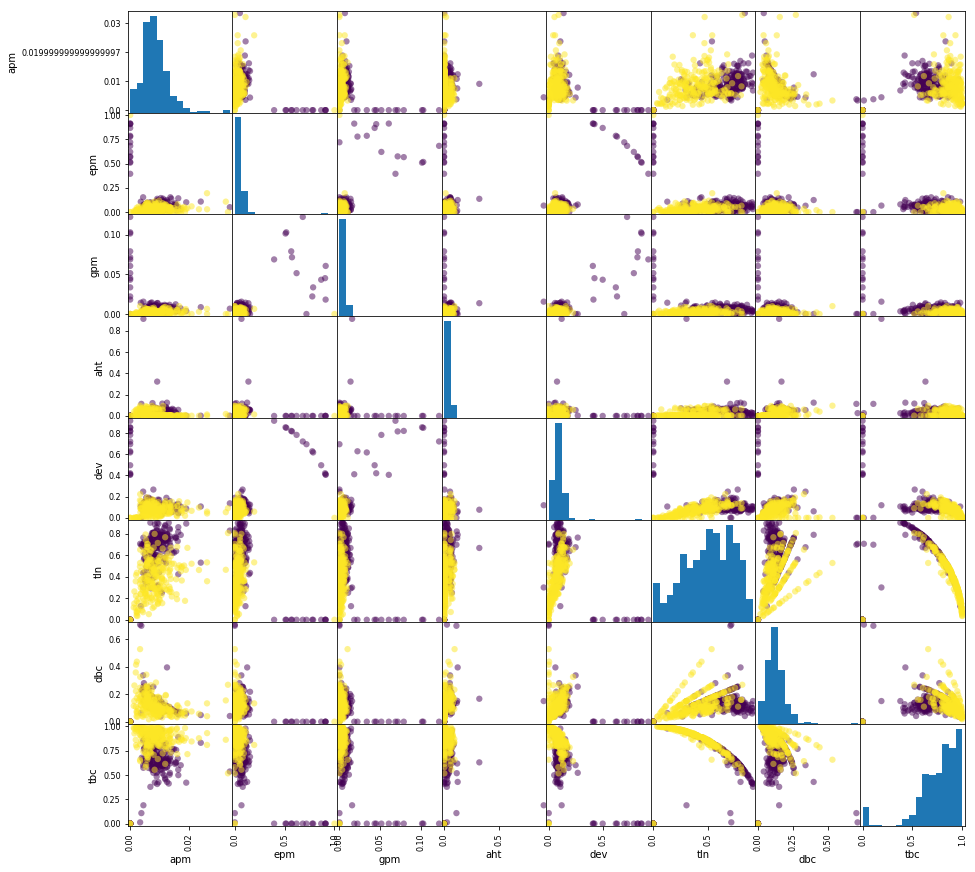

In [41]:
scatter_matrix(X, y)

## From scatter matrix we can see, that 10s time window is too small, because we have lot of "empty windows".

### Box plots

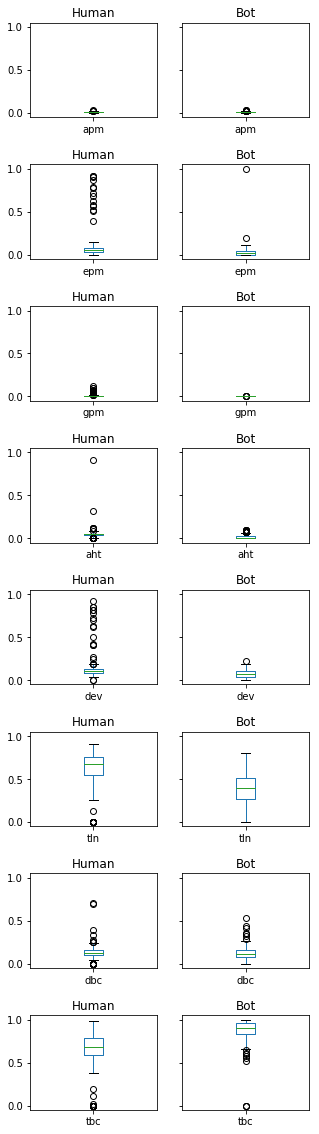

In [57]:
box_plots(X, y)

### Simple plots

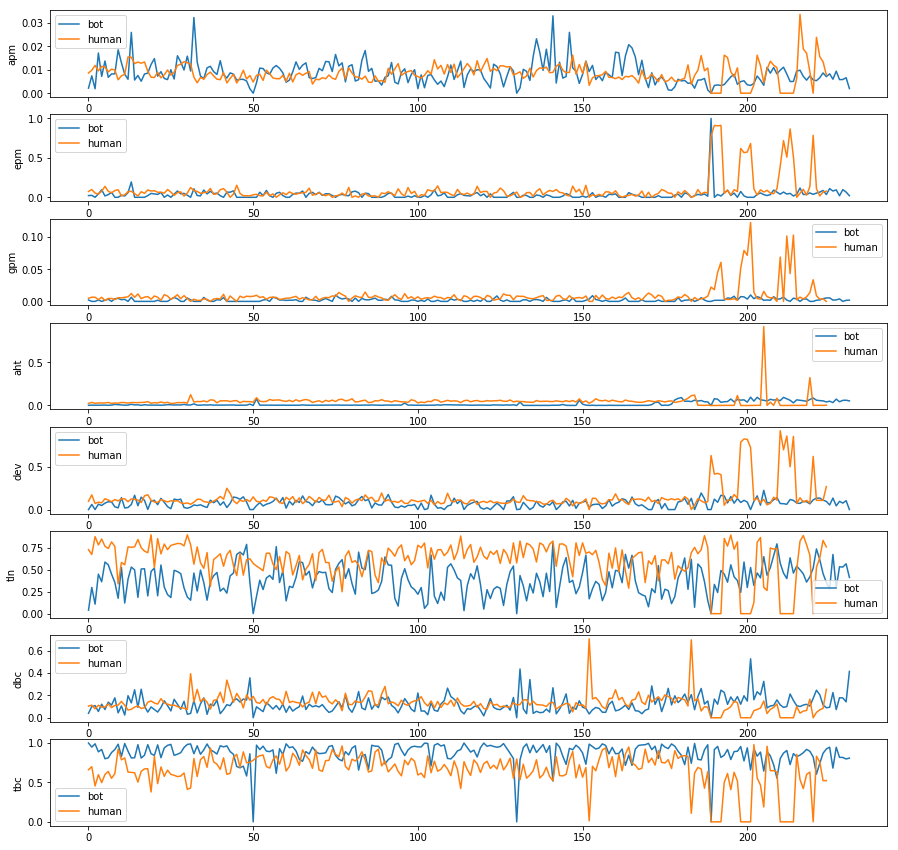

In [58]:
simple_plot(X, y)

### t-SNE

Time elapsed: 10.619919776916504


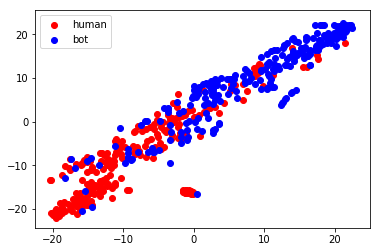

In [61]:
tsne_plot(X, y, perp=40)

## Visualization for 20s time windows

In [62]:
file_path_20 = '../Parser/human-bot-20000-data.csv'

In [63]:
data = pd.read_csv(file_path_20, index_col=[0])

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 9 columns):
apm      232 non-null float64
epm      232 non-null float64
gpm      232 non-null float64
aht      232 non-null float64
dev      232 non-null float64
tln      232 non-null float64
dbc      232 non-null float64
tbc      232 non-null float64
label    232 non-null int64
dtypes: float64(8), int64(1)
memory usage: 18.1 KB


In [65]:
data.describe()

,apm,epm,gpm,aht,dev,tln,dbc,tbc,label
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.004188,0.035081,0.003064,0.017564,0.071894,0.520314,0.072122,0.786141,0.508621
std,0.001766,0.098405,0.008661,0.021960,0.099750,0.207819,0.064621,0.179417,0.501007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003131,0.009891,0.000726,0.002095,0.047175,0.387391,0.046055,0.696145,0.000000
50%,0.003993,0.020910,0.001801,0.017481,0.058276,0.547621,0.063225,0.816626,1.000000
75%,0.005197,0.031221,0.002900,0.026567,0.069771,0.693689,0.081651,0.911841,1.000000
max,0.013222,0.907804,0.092321,0.244653,0.816189,0.889198,0.698372,0.998279,1.000000


In [66]:
X = data.drop('label', axis=1)
y = data['label']

### Scatter matrix

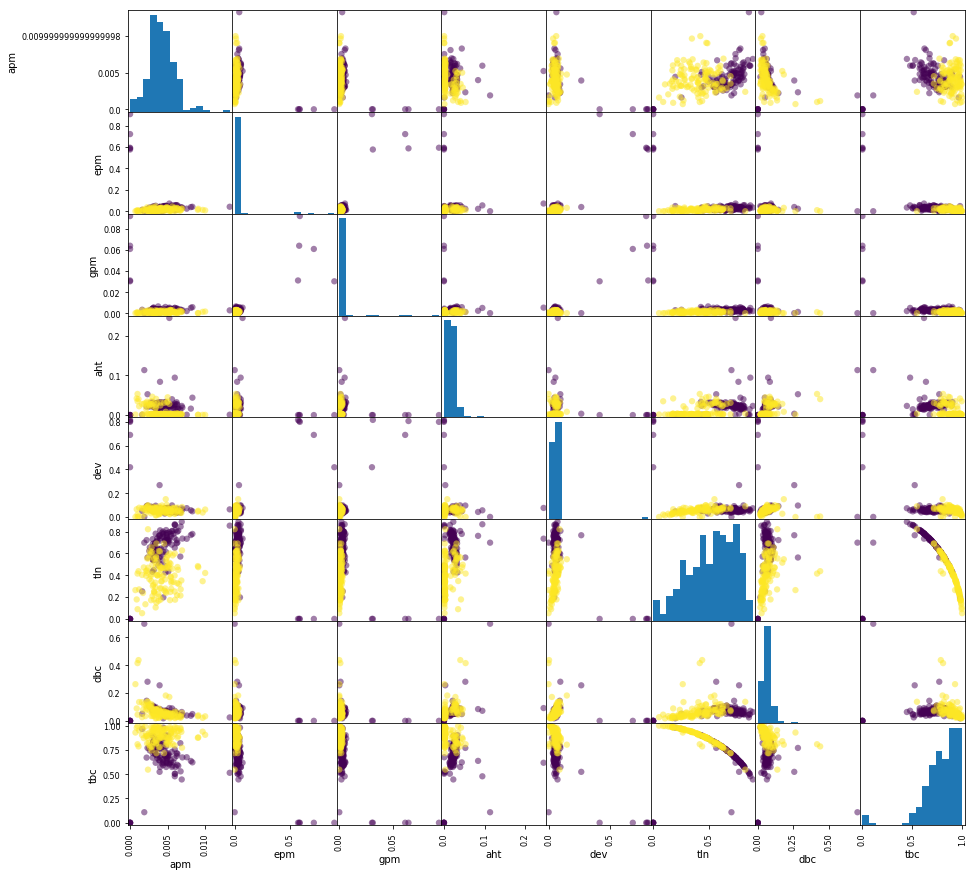

In [67]:
scatter_matrix(X, y)

### 20s time windows are better than 10s-ones.

### Box plots

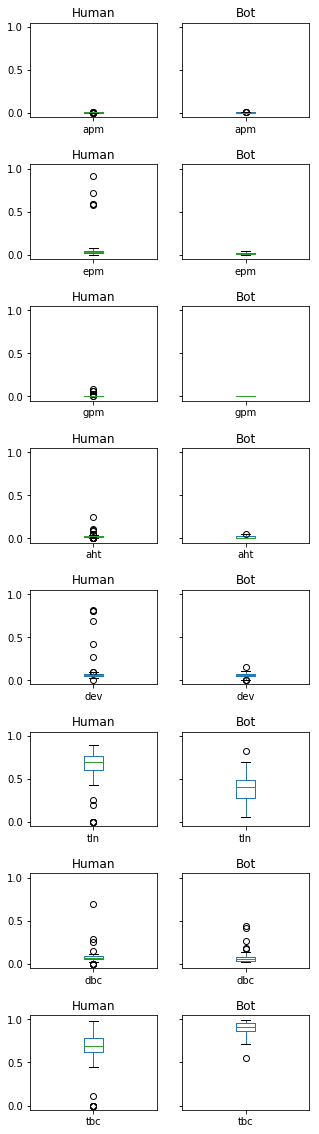

In [68]:
box_plots(X, y)

### Simple plots

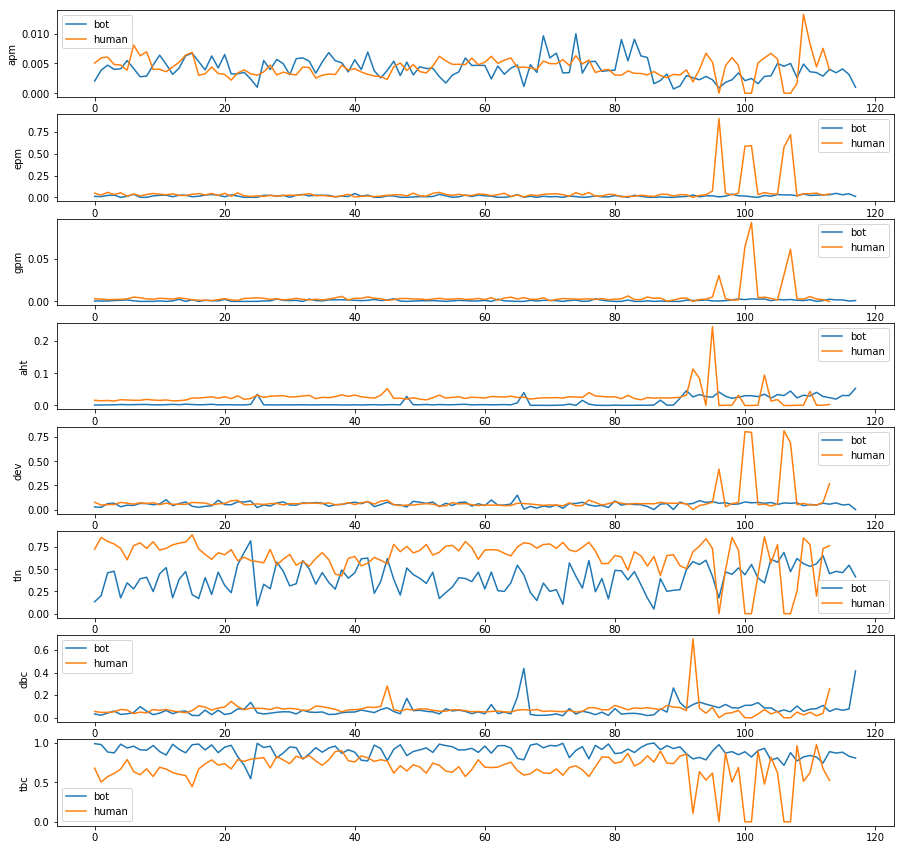

In [69]:
simple_plot(X, y)

### t-SNE

Time elapsed: 3.9011318683624268


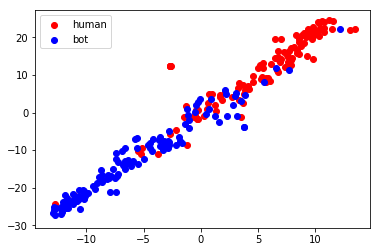

In [73]:
tsne_plot(X, y, perp=25)

# After feature selection

In [83]:
file_path_10 = '../Parser/human-bot-10000-data.csv'

In [84]:
data = pd.read_csv(file_path_10, index_col=[0])

In [85]:
X = data[['gpm', 'tbc', 'epm', 'aht']]
y = data['label']

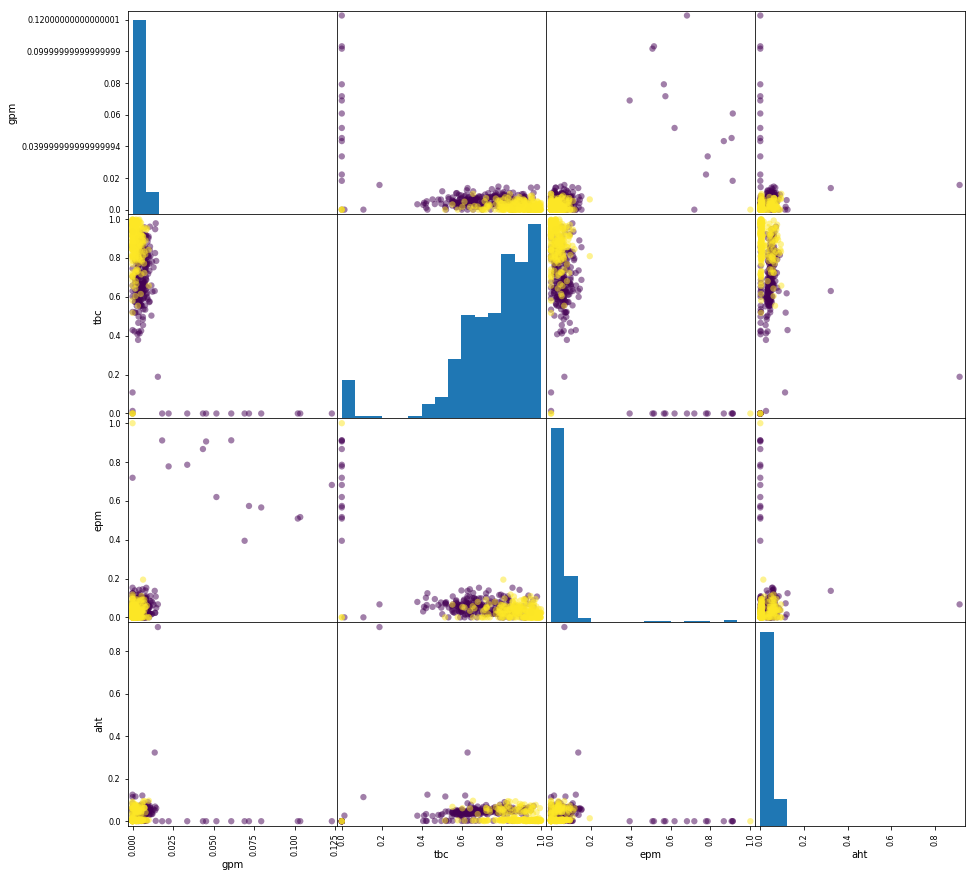

In [86]:
scatter_matrix(X, y)

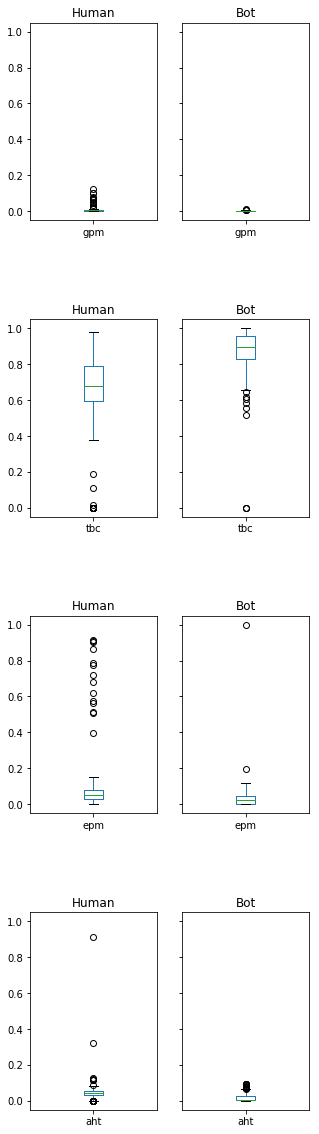

In [87]:
box_plots(X, y)

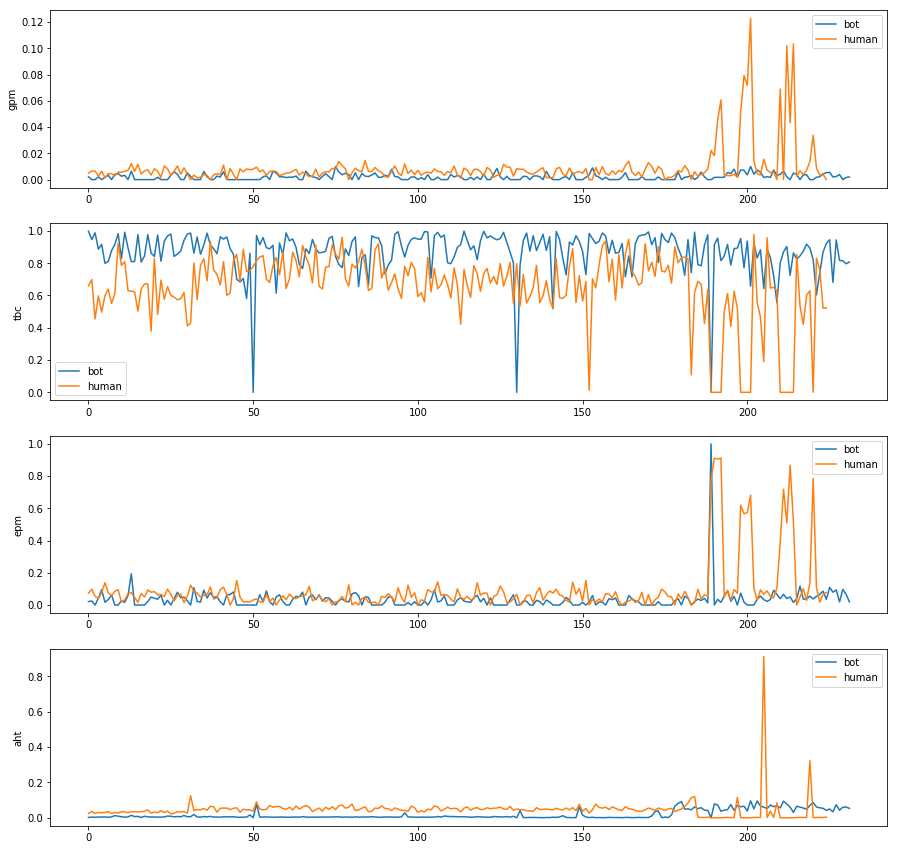

In [88]:
simple_plot(X, y)

Time elapsed: 7.653140068054199


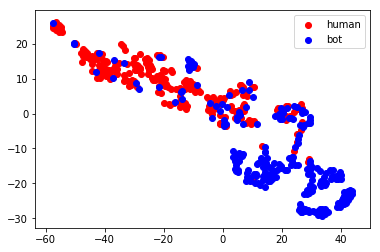

In [92]:
tsne_plot(X, y, perp=20)

#### There is an assumption, that data looks least distributed because of normalization.